<a href="https://colab.research.google.com/github/Shohjahon02/first_my_git/blob/main/05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [17]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [18]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7466 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7466 non-null   object 
 1   district    7466 non-null   object 
 2   rooms       7466 non-null   int64  
 3   size        7466 non-null   float64
 4   level       7466 non-null   int64  
 5   max_levels  7466 non-null   int64  
 6   price       7466 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 724.7+ KB


In [20]:
idx = df[df['price']=='Договорная'].index
df.drop(idx, inplace=True)

In [23]:
df['price'] = df['price'].astype(np.int64)

In [22]:
df['size'] = df['size'].astype(np.float64)

In [7]:
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price


In [21]:
df.loc[5347, 'size'] = 100

In [15]:
df.describe()

,rooms,size,level,max_levels,price
count,7443.000000,7443.000000,7443.000000,7443.000000,7.443000e+03
mean,2.620717,113.650617,3.697031,6.028483,7.144905e+04
std,1.078128,1503.356529,2.237924,2.606763,6.415022e+05
min,1.000000,14.000000,1.000000,1.000000,1.050000e+04
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [26]:
num20 = df[df['size']<=15].index
df.loc[num20]

,location,district,rooms,size,level,max_levels,price
195,"город Ташкент, Мирзо-Улугбекский район, Массив...",Мирзо-Улугбекский,1,11.0,3,9,7500
796,"город Ташкент, Яккасарайский район, 1-й проезд...",Яккасарайский,2,5.0,1,4,50000
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.0,6,9,45000
2147,"город Ташкент, Учтепинский район, Куксарой",Учтепинский,8,8.5,2,2,230000
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.0,1,1,50000
2654,"город Ташкент, Яшнободский район, Мухтара Ашрафи",Яшнободский,1,14.0,1,1,10600
3145,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,14.0,3,4,8000
3695,"город Ташкент, Яшнободский район, Авиасозлар-2...",Яшнободский,1,12.0,2,9,8999
4053,"город Ташкент, Мирзо-Улугбекский район, Элобод",Мирзо-Улугбекский,2,4.0,1,3,26000
4337,"город Ташкент, Мирабадский район, Нукус",Мирабадский,3,5.0,4,5,46600


In [ ]:
num = df[df['size']>1000].index
# num = num.drop(7421)
df.drop(num, inplace=True)
df.loc[num]

In [28]:
numprice = df[df['price']<=10000].index
df.drop(numprice, inplace=True)

In [29]:
df.loc[4089, 'price'] = 118000

In [47]:
df1 = df.copy()

In [ ]:
# for i in len(num):
#   if df1.loc[i+num[0-i], 'size'] > 100:
#     df1.loc[i+num[0-i], 'size'] /= 10
# df1.loc[num]

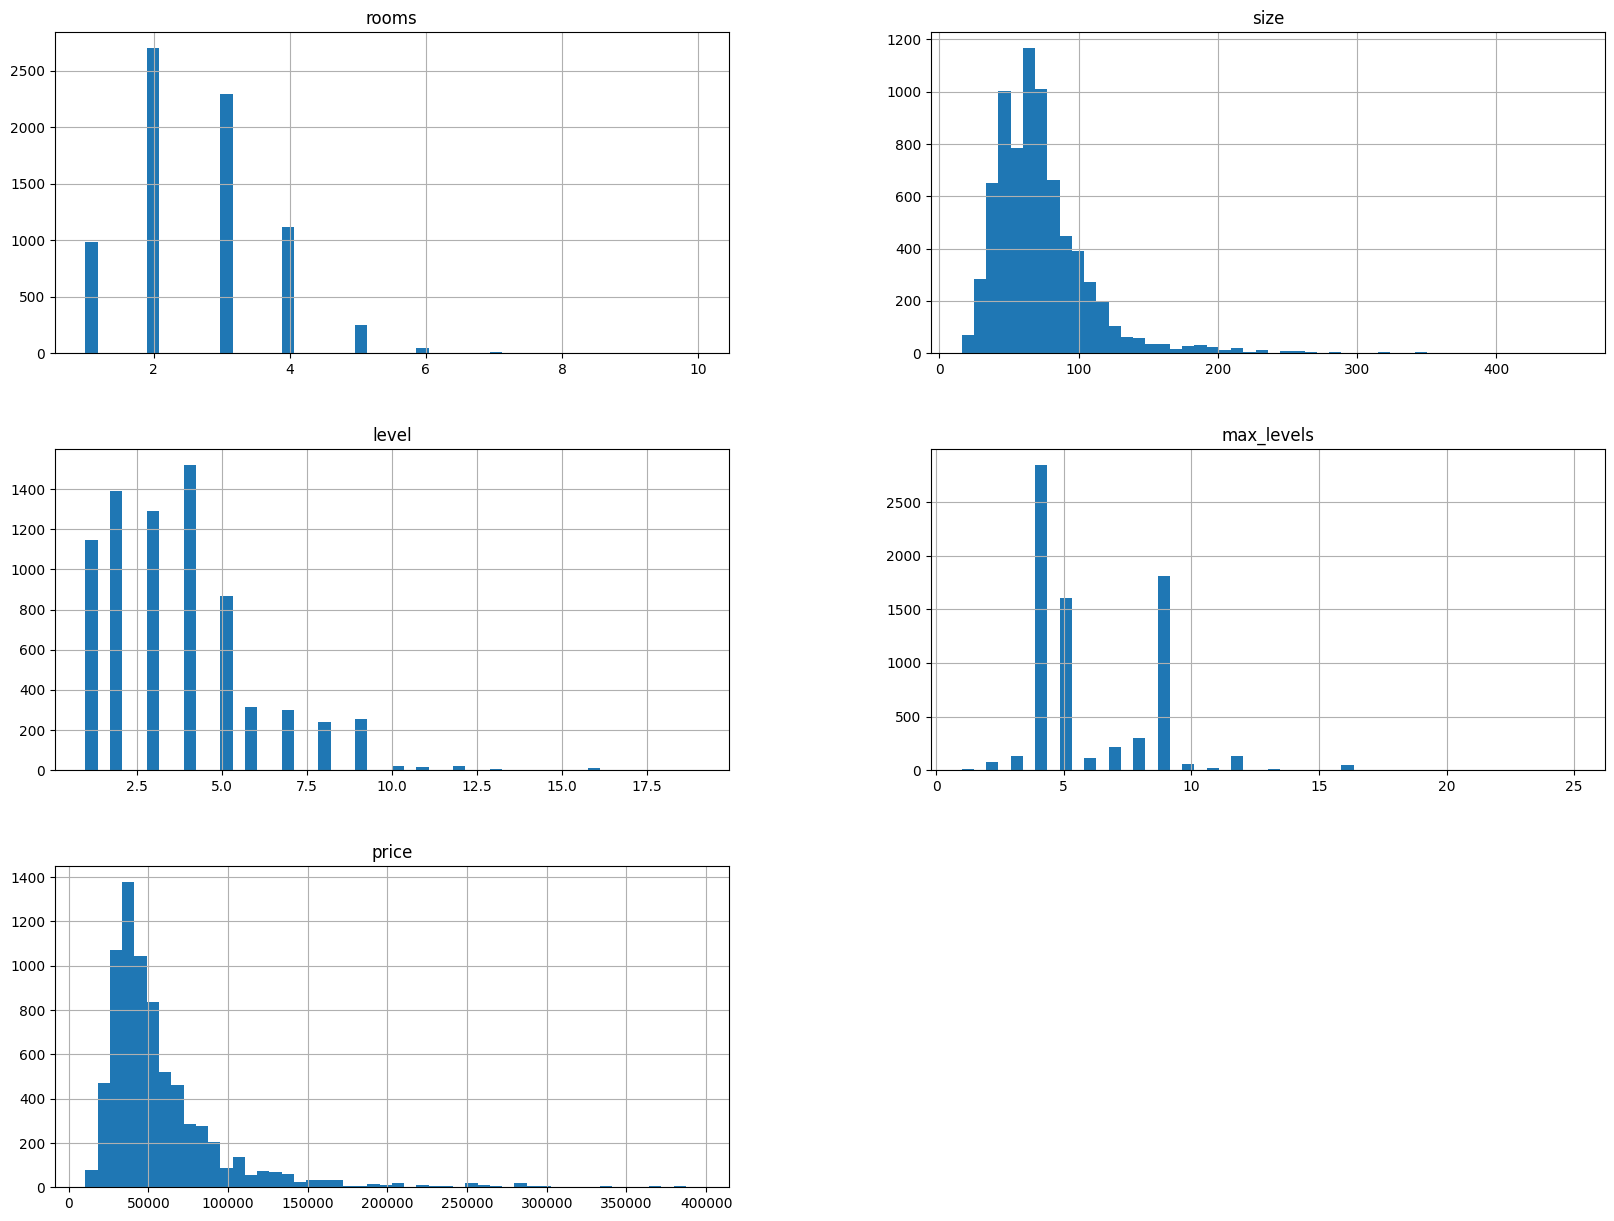

In [55]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [51]:
df.describe()

,rooms,size,level,max_levels,price
count,7409.000000,7409.000000,7409.000000,7409.000000,7410.000000
mean,2.614928,72.818537,3.698610,6.030908,58314.838057
std,1.061575,35.444909,2.238723,2.608393,41870.961392
min,1.000000,16.000000,1.000000,1.000000,10500.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66383.750000
max,10.000000,456.000000,19.000000,25.000000,395000.000000


In [48]:
qimmat = df[df['price']>=400000].index
df[df['price']>=400000]

,location,district,rooms,size,level,max_levels,price


In [49]:
df.drop(qimmat, inplace=True)

In [54]:
arzon = df[df['price']<=15000].index
df[df['price']<=15000]

,location,district,rooms,size,level,max_levels,price
81,"город Ташкент, Учтепинский район, Гулистон",Учтепинский,1.0,20.0,3.0,9.0,14500.0
110,"город Ташкент, Яшнободский район, Ташсельмаш",Яшнободский,1.0,20.0,3.0,3.0,12500.0
141,"город Ташкент, Яшнободский район, 1-й проезд И...",Яшнободский,1.0,37.0,5.0,8.0,13071.0
281,"город Ташкент, Яшнободский район, 2-й проезд И...",Яшнободский,1.0,37.0,4.0,8.0,13075.0
473,"город Ташкент, Яккасарайский район, 1-й проезд...",Яккасарайский,1.0,20.0,2.0,4.0,14500.0
541,"город Ташкент, Яшнободский район, Иззат",Яшнободский,1.0,40.0,5.0,8.0,13700.0
550,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1.0,21.0,3.0,4.0,14700.0
975,"город Ташкент, Мирзо-Улугбекский район, Ахмада...",Мирзо-Улугбекский,1.0,18.0,3.0,4.0,12500.0
1241,"город Ташкент, Чиланзарский район, Наккашлык",Чиланзарский,1.0,17.0,5.0,9.0,12000.0
1961,"город Ташкент, Яшнободский район, 1-й проезд И...",Яшнободский,1.0,42.0,4.0,8.0,14800.0


In [108]:
df.loc[3832	, 'price'] *=10
df.loc[arzon]

,location,district,rooms,size,level,max_levels,price
195,"город Ташкент, Мирзо-Улугбекский район, Массив...",Мирзо-Улугбекский,1,11.0,3,9,7500.0
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000.0
3145,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,14.0,3,4,8000.0
3635,"город Ташкент, Мирзо-Улугбекский район, Массив...",Мирзо-Улугбекский,1,18.0,4,4,10000.0
3695,"город Ташкент, Яшнободский район, Авиасозлар-2...",Яшнободский,1,12.0,2,9,8999.0
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864.0
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000.0
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2.0
7276,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,16.0,3,4,7300.0


In [111]:
df.loc[5073, 'price'] *=10
df.loc[arzon]

,location,district,rooms,size,level,max_levels,price
195,"город Ташкент, Мирзо-Улугбекский район, Массив...",Мирзо-Улугбекский,1,11.0,3,9,7500.0
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,20000.0
3145,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,14.0,3,4,8000.0
3635,"город Ташкент, Мирзо-Улугбекский район, Массив...",Мирзо-Улугбекский,1,18.0,4,4,10000.0
3695,"город Ташкент, Яшнободский район, Авиасозлар-2...",Яшнободский,1,12.0,2,9,8999.0
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,28640.0
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000.0
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2.0
7276,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,16.0,3,4,7300.0


In [56]:
df.shape

(7410, 7)

In [57]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [58]:
train_set

,location,district,rooms,size,level,max_levels,price
5125,"город Ташкент, Яккасарайский район, Кушбеги",Яккасарайский,5.0,109.0,3.0,5.0,80000.0
5355,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,2.0,60.0,4.0,5.0,37000.0
1073,"город Ташкент, Юнусабадский район, Юнусабад 4-...",Юнусабадский,4.0,80.0,3.0,4.0,77500.0
638,"город Ташкент, Мирзо-Улугбекский район, Мирзо-...",Мирзо-Улугбекский,4.0,80.0,5.0,5.0,47000.0
2056,"город Ташкент, Яккасарайский район, Ул Нукуская",Яккасарайский,1.0,43.0,5.0,16.0,38500.0
...,...,...,...,...,...,...,...
5299,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,3.0,65.0,1.0,4.0,46900.0
5334,"город Ташкент, Мирабадский район, Нукус",Мирабадский,4.0,121.0,9.0,10.0,99000.0
5500,"город Ташкент, Сергелийский район, 1-й проезд ...",Сергелийский,2.0,41.0,4.0,7.0,32000.0
876,"город Ташкент, Чиланзарский район, Чопан ота",Чиланзарский,2.0,56.0,4.0,4.0,35000.0


In [59]:
test_set

,location,district,rooms,size,level,max_levels,price
5133,"город Ташкент, Яккасарайский район, Шота Руста...",Яккасарайский,2.0,53.0,4.0,5.0,52000.0
1571,"город Ташкент, Сергелийский район, Сергели-VIа",Сергелийский,2.0,49.0,3.0,7.0,35000.0
2472,"город Ташкент, Яккасарайский район, Ракат",Яккасарайский,2.0,60.0,2.0,3.0,60000.0
5859,"город Ташкент, Мирзо-Улугбекский район, 2-й Па...",Мирзо-Улугбекский,3.0,75.0,5.0,9.0,41500.0
2592,"город Ташкент, Мирзо-Улугбекский район, Садык ...",Мирзо-Улугбекский,2.0,60.0,2.0,9.0,61000.0
...,...,...,...,...,...,...,...
1513,"город Ташкент, Юнусабадский район, Юнусабад 13кв",Юнусабадский,2.0,53.0,3.0,4.0,34500.0
1622,"город Ташкент, Олмазорский район, Каракамыш кв...",Олмазорский,3.0,113.0,4.0,4.0,63000.0
4083,"город Ташкент, Юнусабадский район, Эски Юнусабад",Юнусабадский,2.0,58.0,2.0,4.0,41500.0
6068,"город Ташкент, Мирабадский район, Тонг Юлдузи",Мирабадский,2.0,40.0,1.0,1.0,26000.0


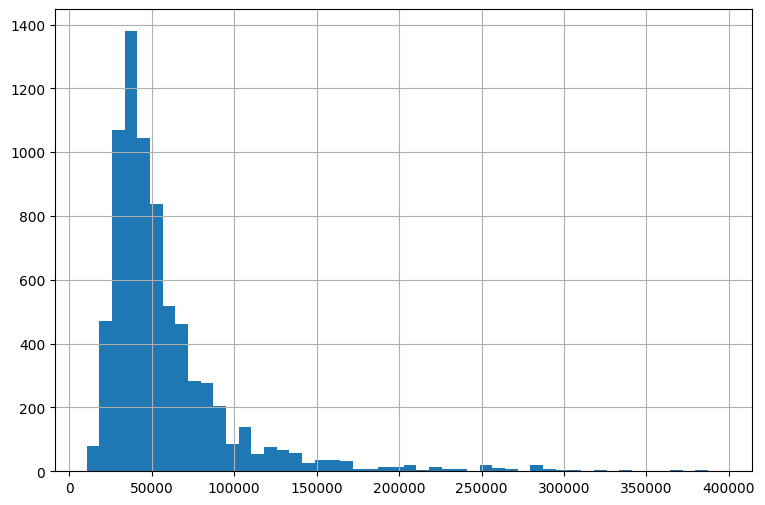

In [60]:
%matplotlib inline
df['price'].hist(bins=50, figsize=(9,6))
plt.show()

In [61]:
df.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
size          0.794956
rooms         0.566550
max_levels    0.239768
level         0.065051
dtype: float64

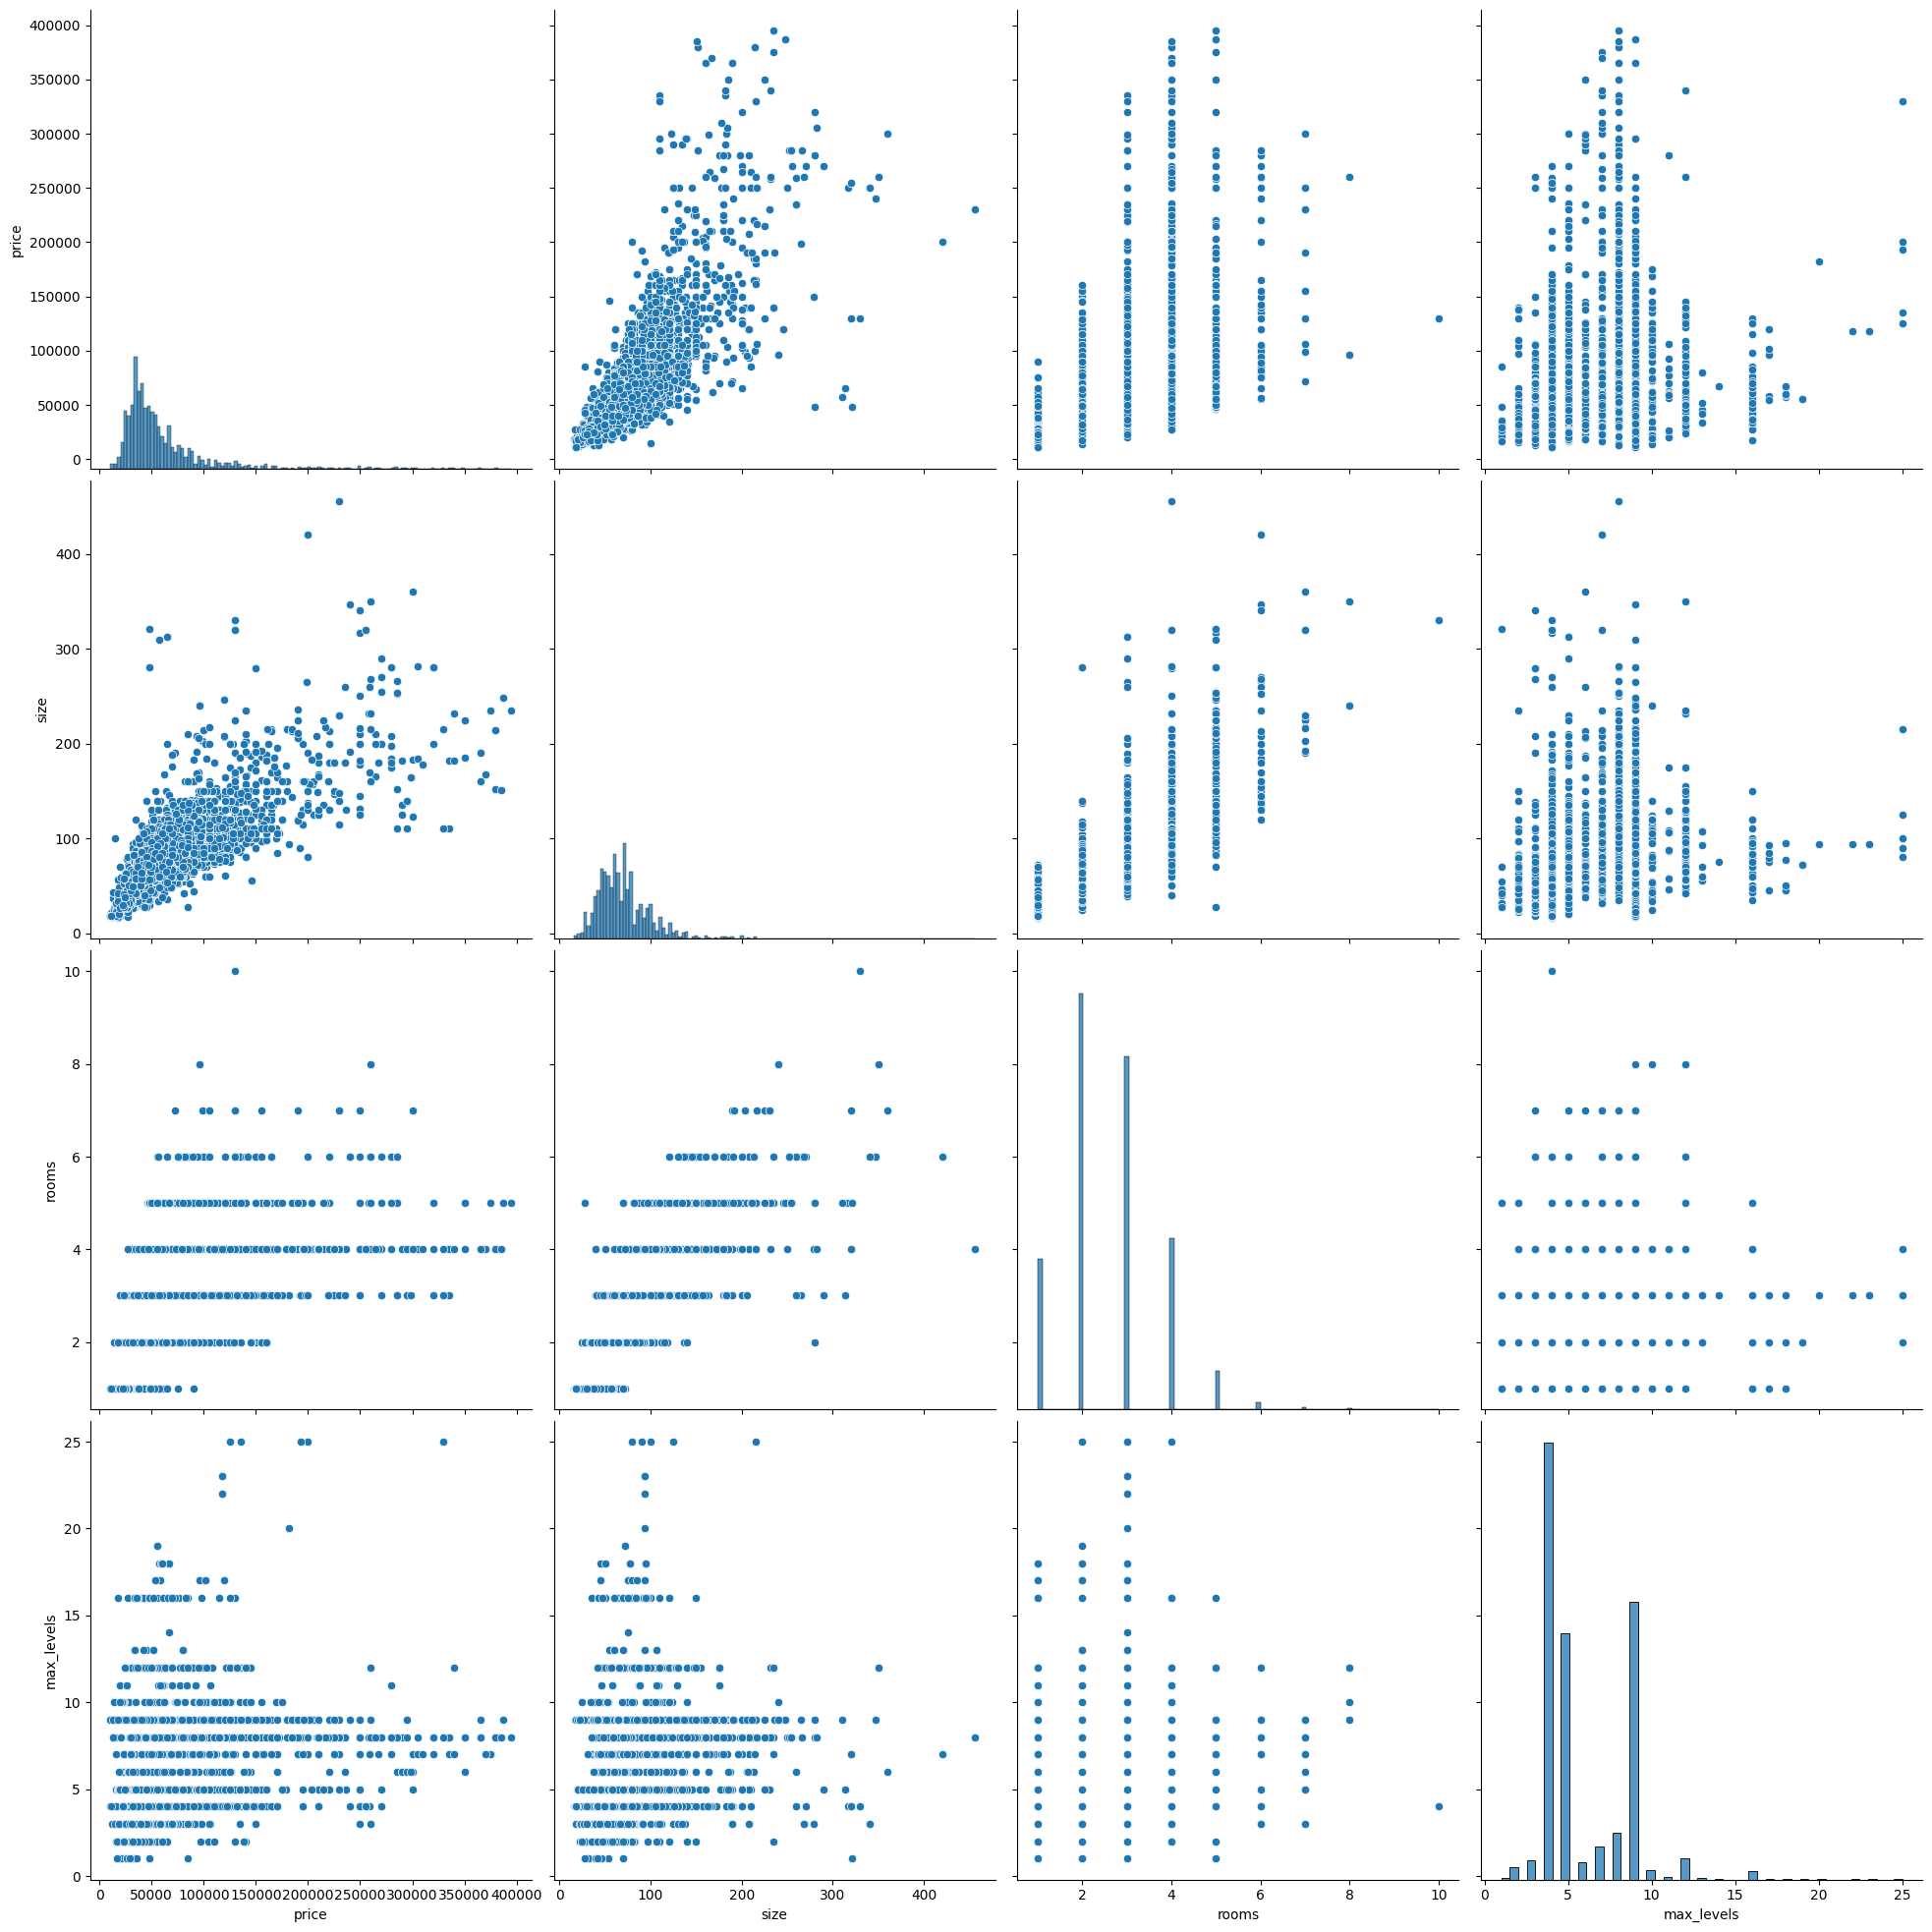

In [62]:
cols = ['price','size','rooms','max_levels']
sns.pairplot(df[cols], height=5)
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


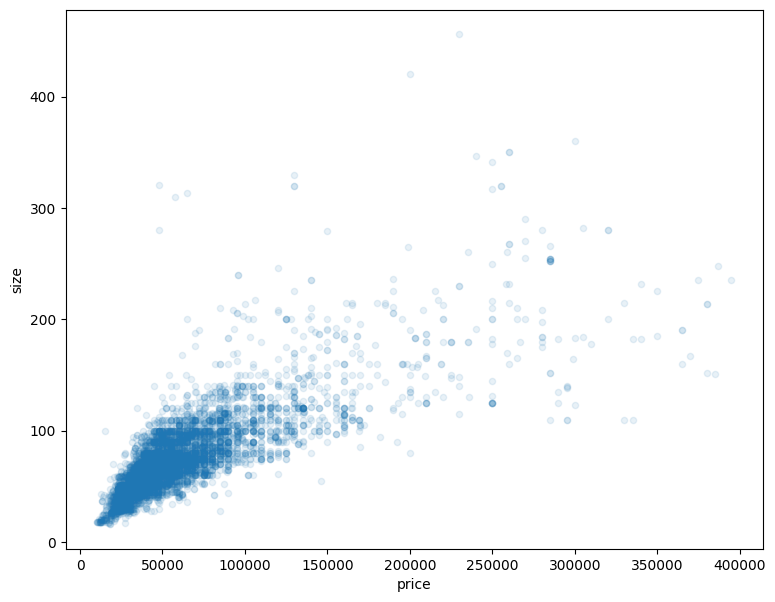

In [63]:
df.plot(kind='scatter', x="price", y="size", alpha=0.1, figsize=(9,7))
plt.show()

In [64]:
df.to_csv('my_data1.csv')